# LAB 9 - Speech to Text 

## Exercise 1: Load the LibriSpeech dataset 

In [1]:
from datasets import load_dataset

# Load the validation split of the clean subset of the LibriSpeech dataset
dataset = load_dataset("distil-whisper/librispeech_long", "clean", split="validation")

# Example: Print the first sample from the validation dataset
first_sample = dataset[0]



In [2]:
#Check which arguments the first sample has
first_sample.keys()

dict_keys(['audio'])

In [3]:
#Check what's inside the audio argument
first_sample['audio']

{'path': '0d38672e0bbdbdc460af55b8bb84a15b2730db2819f2af64f9c777d4d586f2de',
 'array': array([0.00238037, 0.0020752 , 0.00198364, ..., 0.00024414, 0.00048828,
        0.0005188 ]),
 'sampling_rate': 16000}

## Exercise 2: Use the Whisper large v3 model for speech recognition

In [4]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration
import torch
import torchaudio

# Load the Whisper large v3 model and processor
model_id = 'openai/whisper-large-v3'
processor = WhisperProcessor.from_pretrained(model_id)
model = WhisperForConditionalGeneration.from_pretrained(model_id)

# Function to process audio and perform speech recognition
def transcribe(audio_array, sampling_rate):
    '''
    Transcribes the given audio array using a speech-to-text model.

    Args:
        audio_array (numpy.ndarray): The audio waveform as a numpy array.
        sampling_rate (int): The sampling rate of the audio.

    Returns:
        str: The transcription of the audio.

    '''
    # Resample the audio to 16kHz if necessary
    if sampling_rate != 16000:
        resampler = torchaudio.transforms.Resample(sampling_rate, 16000)
        audio_array = resampler(torch.tensor(audio_array).unsqueeze(0)).squeeze().numpy()

    # Process the audio
    inputs = processor(audio_array, return_tensors="pt", sampling_rate=16000)
    
    # Generate the transcription
    with torch.no_grad():
        generated_ids = model.generate(inputs.input_features, max_length = 256)
        transcription = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    
    return transcription

# Example: Transcribe the first sample in the dataset
first_sample = dataset[0]
audio_array = first_sample['audio']['array']
sampling_rate = first_sample['audio']['sampling_rate']
transcription = transcribe(audio_array, sampling_rate)
print(f"Transcription: {transcription}")


/export/hhome/nlp2_g09/Project/.conda/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.


Transcription:  Mr. Quilter is the apostle of the middle classes, and we are glad to welcome his gospel. Nor is Mr. Quilter's manner less interesting than his matter. He tells us that at this festive season of the year, with Christmas and roast beef looming before us, similes drawn from eating and its results occur most readily to the mind. He has grave doubts whether Sir Frederick Leighton's work is really Greek after all,


In [5]:
#Load a new dataset that contain ground truth for the transcriptions 
dataset = load_dataset("hf-internal-testing/librispeech_asr_dummy", "clean", split="validation")

/export/hhome/nlp2_g09/Project/.conda/lib/python3.11/site-packages/datasets/load.py:1486: FutureWarning: The repository for hf-internal-testing/librispeech_asr_dummy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hf-internal-testing/librispeech_asr_dummy
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [6]:
#Check the arguments of the new dataset samples
dataset[0].keys()

dict_keys(['file', 'audio', 'text', 'speaker_id', 'chapter_id', 'id'])

In [7]:
#Check a sample of a text transcription
dataset[0]['text']

'MISTER QUILTER IS THE APOSTLE OF THE MIDDLE CLASSES AND WE ARE GLAD TO WELCOME HIS GOSPEL'

In [8]:
# Create an empty list to store the ground truth transcriptions
gt_list = []

# Iterate over the first 30 samples in the dataset
for idx in range(30):
    # Get the text transcription from the dataset and convert it to lowercase
    txt_array = dataset[idx]['text']
    gt_list.append(txt_array.lower())

In [9]:
#Check that the content in the ground truth list is correct
gt_list

['mister quilter is the apostle of the middle classes and we are glad to welcome his gospel',
 "nor is mister quilter's manner less interesting than his matter",
 'he tells us that at this festive season of the year with christmas and roast beef looming before us similes drawn from eating and its results occur most readily to the mind',
 "he has grave doubts whether sir frederick leighton's work is really greek after all and can discover in it but little of rocky ithaca",
 "linnell's pictures are a sort of up guards and at em paintings and mason's exquisite idylls are as national as a jingo poem mister birket foster's landscapes smile at one much in the same way that mister carker used to flash his teeth and mister john collier gives his sitter a cheerful slap on the back before he says like a shampooer in a turkish bath next man",
 'it is obviously unnecessary for us to point out how luminous these criticisms are how delicate in expression',
 'on the general principles of art mister q

In [10]:
# Print the length of the dataset and the keys of the 10th sample
print("dataset", len(dataset), dataset[10].keys())

# Create an empty list to store the transcriptions
transcriptions_list = []

# Iterate over the first 30 samples in the dataset
for idx in range(30):
    # Get the audio array and sampling rate from the dataset
    audio_array = dataset[idx]['audio']['array']
    sampling_rate = dataset[idx]['audio']['sampling_rate']
    
    # Transcribe the audio and append the transcription to the list
    transcription = transcribe(audio_array, sampling_rate)
    transcriptions_list.append(transcription)
    
    # Print the transcription
    print(f"Transcription{idx}: {transcription}")

dataset 73 dict_keys(['file', 'audio', 'text', 'speaker_id', 'chapter_id', 'id'])
Transcription0:  Mr. Quilter is the apostle of the middle classes, and we are glad to welcome his gospel.
Transcription1:  Nor is Mr. Quilter's manner less interesting than his matter.
Transcription2:  he tells us that at this festive season of the year with christmas and roast beef looming before us similes drawn from eating and its results occur most readily to the mind
Transcription3:  He has grave doubts whether Sir Frederick Leighton's work is really Greek after all, and can discover in it but little of rocky Ithaca.
Transcription4:  linnell's pictures are a sort of up guards and adam paintings and mason's exquisite idylls are as national as a jingo poem mr burkett foster's landscapes smile at one much in the same way that mr carker used to flash his teeth and mr john collier gives his sitter a cheerful slap on the back before he says like a shampooer in a turkish bath next man
Transcription5:  It is

### COMPUTE METRICS
In this section we compute all the metrics for the model outputs given the ground truth of the dataset

The metrics used:

- PRECISSION ROUGE SCORE 

- RECALL ROUGE SCORE 

- f1 ROUGE SCORE 

In [11]:
import nltk
from itertools import combinations

# Define a function to generate skip-bigrams
def skip_bigrams(tokens, k=2):
    # Generate skip-bigrams with a distance of up to k words between them
    skip_bigrams = set()
    #iterate over the tokens
    for i, first_word in tokens:
        #iterate over the tokens
        for j in range(i+1, i+k+1):
            #check if the token is in the tokens
            if j < len(tokens):
                #get the second word
                second_word = tokens[j][0]
                #add the skip-bigram to the set
                skip_bigrams.add((first_word, second_word))
    #return the skip-bigrams
    return skip_bigrams


#Crate lists to save the precision, recall and f1 scores for each transcription
precision_lists = []
recall_lists = []
f1_scores_lists = []

for trans, gt in zip(transcriptions_list, gt_list):
    # Tokenize the sentences and enumerate tokens
    prediction_tokens = list(enumerate(nltk.word_tokenize(trans)))
    reference_tokens = list(enumerate(nltk.word_tokenize(gt)))

    # Get skip-bigrams for the prediction and reference sentences
    prediction_skip_bigrams = skip_bigrams(prediction_tokens)
    reference_skip_bigrams = skip_bigrams(reference_tokens)

    # Calculate the matches between the prediction and reference skip-bigrams
    matches = len(prediction_skip_bigrams.intersection(reference_skip_bigrams))

    # Calculate precision, recall, and F1 score
    precision_s = matches / len(prediction_skip_bigrams) if prediction_skip_bigrams else 0
    recall_s = matches / len(reference_skip_bigrams) if reference_skip_bigrams else 0
    f1_score_s = 2 * (precision_s * recall_s) / (precision_s + recall_s) if (precision_s + recall_s) > 0 else 0

    # Print skip-bigram scores
    print("Predicted Translation: ", trans)
    print("Ground Truth: ", gt)
    print("ROUGE-S Precision:", precision_s)
    precision_lists.append(precision_s)
    print("ROUGE-S Recall:", recall_s)
    recall_lists.append(recall_s)
    print("ROUGE-S F1-Score:", f1_score_s, "\n")
    f1_scores_lists.append(f1_score_s)

Predicted Translation:   Mr. Quilter is the apostle of the middle classes, and we are glad to welcome his gospel.
Ground Truth:  mister quilter is the apostle of the middle classes and we are glad to welcome his gospel
ROUGE-S Precision: 0.5714285714285714
ROUGE-S Recall: 0.6451612903225806
ROUGE-S F1-Score: 0.606060606060606 

Predicted Translation:   Nor is Mr. Quilter's manner less interesting than his matter.
Ground Truth:  nor is mister quilter's manner less interesting than his matter
ROUGE-S Precision: 0.6190476190476191
ROUGE-S Recall: 0.6842105263157895
ROUGE-S F1-Score: 0.6500000000000001 

Predicted Translation:   he tells us that at this festive season of the year with christmas and roast beef looming before us similes drawn from eating and its results occur most readily to the mind
Ground Truth:  he tells us that at this festive season of the year with christmas and roast beef looming before us similes drawn from eating and its results occur most readily to the mind
ROUGE-

In [12]:
# Import the jiwer package for computing Word Error Rate (WER)
import jiwer

# Compute WER
for trans, gt in zip(transcriptions_list, gt_list):
    # Calculate the Word Error Rate (WER) between the transcription and ground truth
    wer = jiwer.wer(trans, gt)
    
    # Print the transcription and ground truth
    print("Transcription", trans)
    print("Ground Truth", gt)   
    
    # Print the Word Error Rate (WER)
    print(f"Word Error Rate (WER): {wer:.2f} \n")

Transcription  Mr. Quilter is the apostle of the middle classes, and we are glad to welcome his gospel.
Ground Truth mister quilter is the apostle of the middle classes and we are glad to welcome his gospel
Word Error Rate (WER): 0.24 

Transcription  Nor is Mr. Quilter's manner less interesting than his matter.
Ground Truth nor is mister quilter's manner less interesting than his matter
Word Error Rate (WER): 0.40 

Transcription  he tells us that at this festive season of the year with christmas and roast beef looming before us similes drawn from eating and its results occur most readily to the mind
Ground Truth he tells us that at this festive season of the year with christmas and roast beef looming before us similes drawn from eating and its results occur most readily to the mind
Word Error Rate (WER): 0.00 

Transcription  He has grave doubts whether Sir Frederick Leighton's work is really Greek after all, and can discover in it but little of rocky Ithaca.
Ground Truth he has grav

In [13]:

import numpy as np
#Print all the average scores for every metric 
print("AVERAGE ROUGE-S Precision:", np.mean(precision_lists))
print("AVERAGE ROUGE-S Recall:", np.mean(recall_lists))
print("AVERAGE ROUGE-S F1-Score:", np.mean(f1_scores_lists), "\n")

AVERAGE ROUGE-S Precision: 0.5372650362076299
AVERAGE ROUGE-S Recall: 0.600876610027253
AVERAGE ROUGE-S F1-Score: 0.5647105749742338 



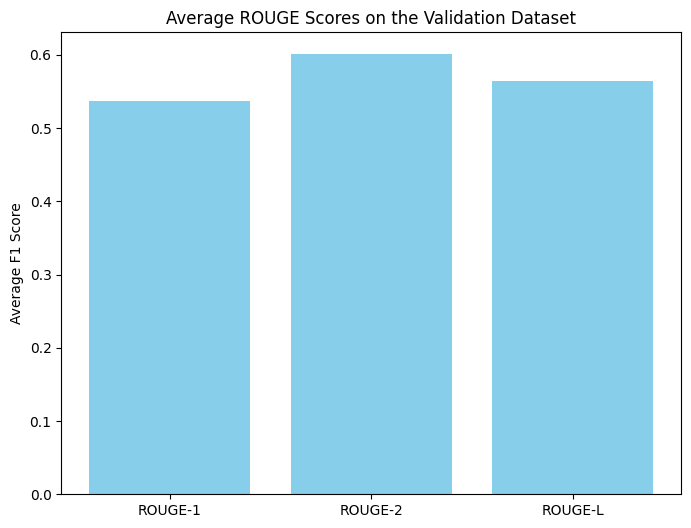

In [16]:
#Plot the results in a more visual way
import matplotlib.pyplot as plt

# Get the average scores for each metric
rouge1_score = np.mean(precision_lists)
rouge2_score = np.mean(recall_lists)
rougeL_score = np.mean(f1_scores_lists)

# Plot the average scores
plt.figure(figsize=(8, 6))
plt.bar(['ROUGE-1', 'ROUGE-2', 'ROUGE-L'], [rouge1_score, rouge2_score, rougeL_score], color='skyblue')
plt.ylabel('Average F1 Score')
plt.title('Average ROUGE Scores on the Validation Dataset')
plt.show()

## Translation 

### Exercise 3: Translate the generated text from English to another language

In the next section we will translate the output of the whisper model from english to spanish using an LLM 

In [48]:
from transformers import AutoModelForCausalLM, AutoTokenizer


#Import the model and tokenizer for the Phi-3-mini-4k-instruct model
model = AutoModelForCausalLM.from_pretrained("microsoft/Phi-3-mini-4k-instruct")

tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")

/export/hhome/nlp2_g09/Project/.conda/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
`flash-attention` package not found, consider installing for better performance: No module named 'flash_attn'.
Current `flash-attention` does not support `window_size`. Either upgrade or use `attn_implementation='eager'`.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [56]:
# Iterate over each transcription in the list
for trans in transcriptions_list:
    # Create the English text prompt for translation
    english_text = f" Translate to Spanish: {trans}, Translation: "

    # Tokenize the input prompt
    inputs = tokenizer.encode(english_text, return_tensors="pt")

    # Generate the translation
    inputs[:150]  # Optional: Print the first 150 tokens of the input
    outputs = model.generate(inputs, max_length=150, num_beams=5, early_stopping=True)
    
    # Decode and print the translated text
    translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print("Input Text:", english_text)
    print("Translated text:", translated_text, "\n")

Input Text:  Translate to Spanish:  Mr. Quilter is the apostle of the middle classes, and we are glad to welcome his gospel., Translation:  

Translated text:  Translate to Spanish:  Mr. Quilter is the apostle of the middle classes, and we are glad to welcome his gospel., Translation:  Sr. Quilter es el apóstol de las clases medias, y estamos encantados de recibir su evangelio.

Input Text:  Translate to Spanish:  Nor is Mr. Quilter's manner less interesting than his matter., Translation:  

Translated text:  Translate to Spanish:  Nor is Mr. Quilter's manner less interesting than his matter., Translation:  Ni el modo de Mr. Quilter no es menos interesante que su asunto.

Input Text:  Translate to Spanish:  he tells us that at this festive season of the year with christmas and roast beef looming before us similes drawn from eating and its results occur most readily to the mind, Translation:  

Translated text:  Translate to Spanish:  he tells us that at this festive season of the year 